In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aotools.turbulence import phasescreen
from scipy.special import laguerre
from aotools import opticalpropagation
from aotools.turbulence.phasescreen import ft_phase_screen as ps
from aotools.turbulence.phasescreen import ft_sh_phase_screen as psh
from functions.functions_turbulence import *

"""
r0 (float) – r0 parameter of scrn in metres
N (int) – Size of phase scrn in pxls
delta (float) – size in Metres of each pxl
L0 (float) – Size of outer-scale in metres
l0 (float) – inner scale in metres
"""
# %% Beam parameters
lmbda = 550e-9
L_prop = 4e-5
width0 = 1e-6
l, p = 0, 0
# xy_lim_2D = (-8.0e-6, 8.0e-6)
xy_lim_2D = (-20.0e-6, 20.0e-6)
res_xy_2D = 150

beam_par = (l, p, width0, lmbda)
k0 = 2 * np.pi / lmbda
xy_2D = np.linspace(*xy_lim_2D, res_xy_2D)
mesh_2D = np.meshgrid(xy_2D, xy_2D, indexing='ij')
pxl_scale = (xy_lim_2D[1] - xy_lim_2D[0]) / (res_xy_2D - 1)
D_window = (xy_lim_2D[1] - xy_lim_2D[0])
perfect_scale = lmbda * np.sqrt(L_prop ** 2 + (D_window / 2) ** 2) / D_window
print(f'dx={pxl_scale * 1e6: .2f}um, perfect={perfect_scale * 1e6: .2f}um,'
      f' resolution required={math.ceil(D_window / perfect_scale + 1)}')
assert res_xy_2D > D_window / perfect_scale + 1, 'Resolution is too low'
# %% turbulence parameters
# Cn2_real_array = [1e-17, 1e-16, 1e-15, 1e-14, 1e-13]  # strong -> weak
Cn2 = 10e-1
Cn2 = 5e-1
Cn2 = 1e-1
r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=L_prop)
L0 = 5
l0 = 1e-7  # !!!!!!
psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)

# %%

screens_num = screens_number(Cn2, k0, dz=L_prop)
print(f'Number of screen required: {screens_num}')
# exit()
LG_21_2D = LG_simple(*mesh_2D, z=0, l=2, p=1, width=width0, k0=k0, x0=0, y0=0, z0=0)
# LG_21_2D_z01 = LG_simple(*mesh_2D, z=L_prop, l=2, p=1, width=width0, k0=k0, x0=0, y0=0, z0=0)


# plot_field_both(LG_21_2D, extend=None)
# plot_field_both(LG_21_2D_z01, extend=None)


# psh_test = psh_wrap(psh_par)




field = propagation_ps(LG_21_2D, beam_par, psh_par, L_prop, screens_num=4)
# plot_field_both(field, extend=None)


# 0.81

dx= 0.27um, perfect= 0.61um, resolution required=67
Number of screen required: 1.3881530375719366


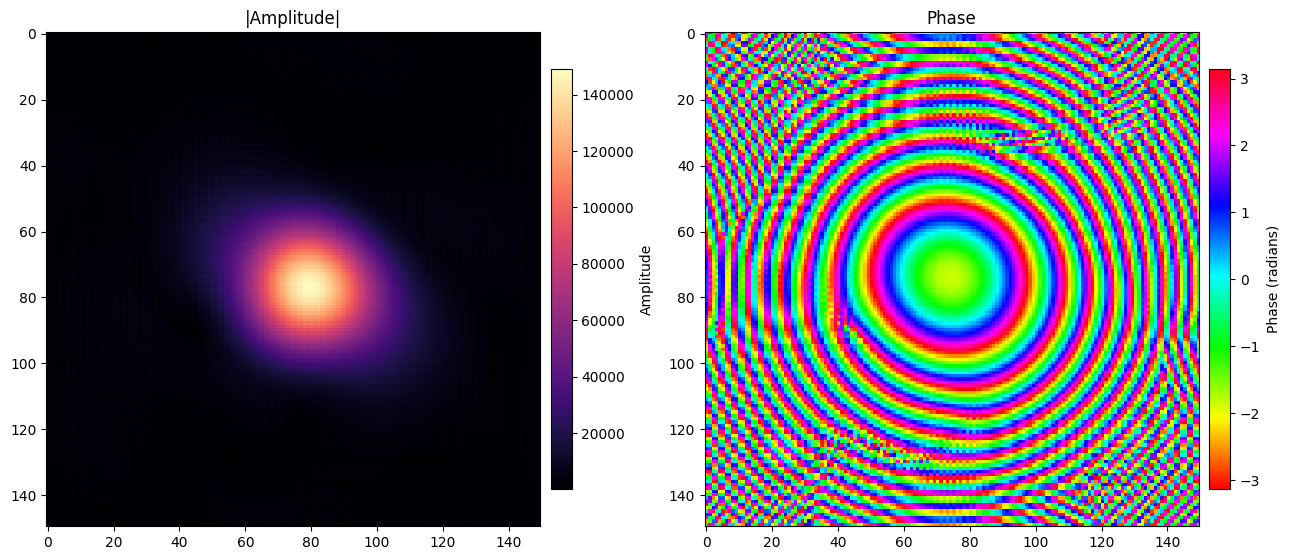

SR=0.8528345717956499


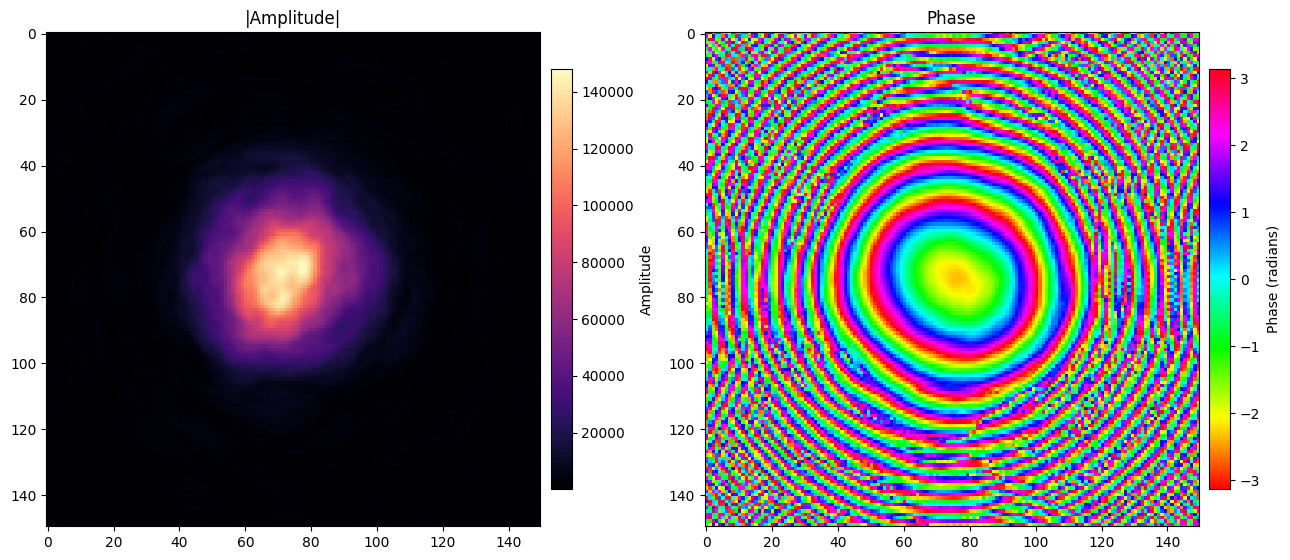

SR=0.9145982802312311


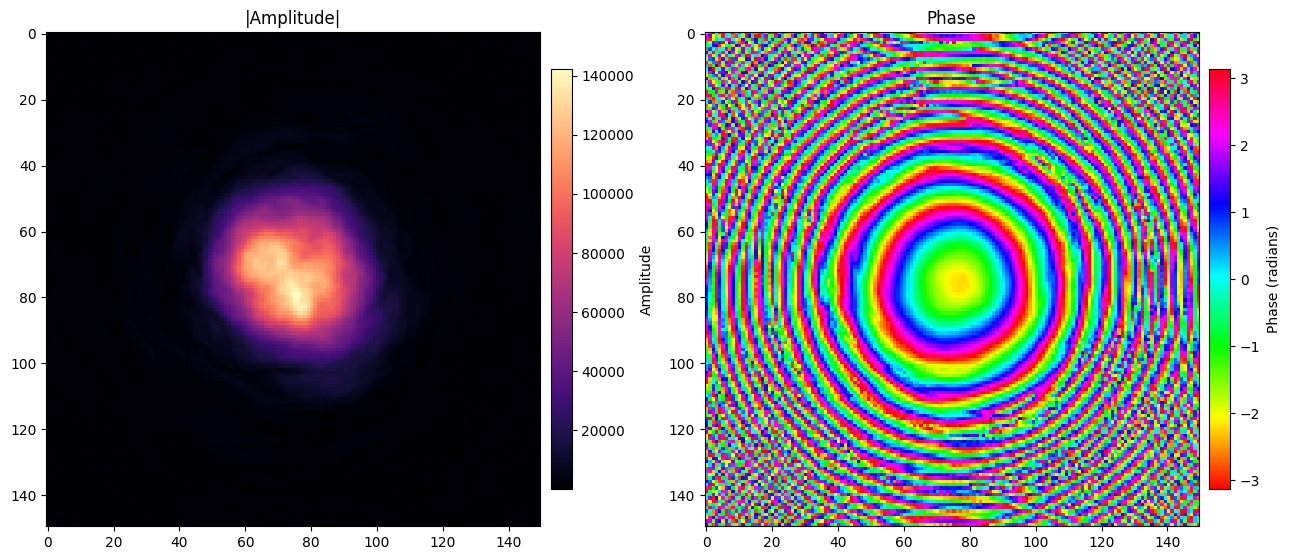

SR=0.9342171676164609


In [3]:
SR_nps_1e1 = []
for screens_num in [1, 5, 10]:
      SR = SR_gauss(mesh_2D, L_prop, beam_par, psh_par, epochs=500, screens_num=screens_num)
      SR_nps_1e1.append(SR)

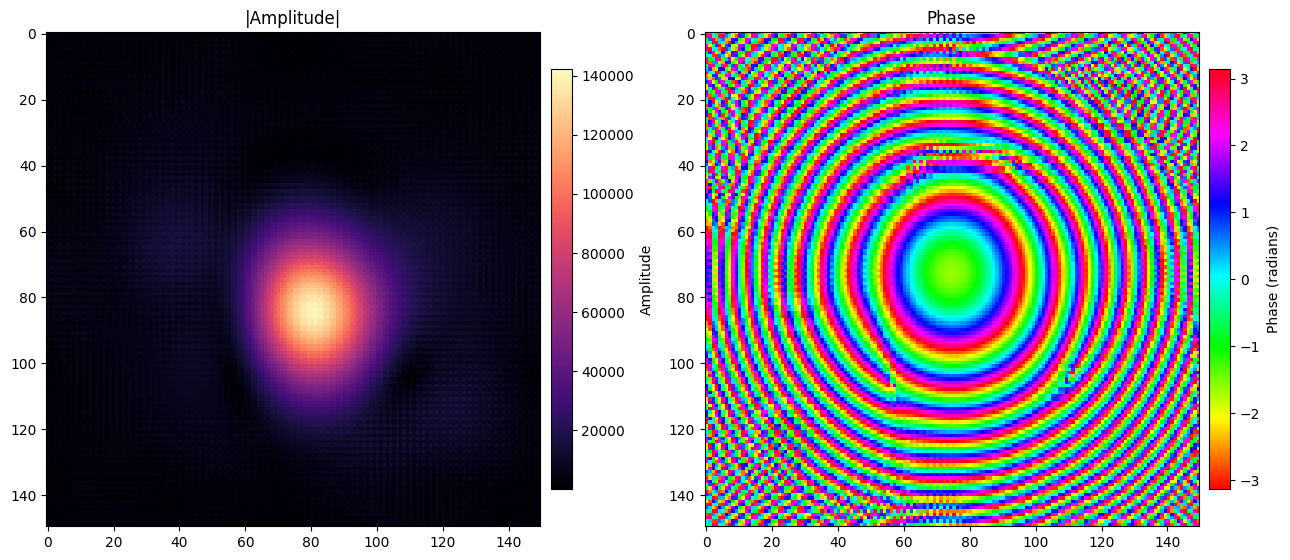

SR=0.4753945443635765


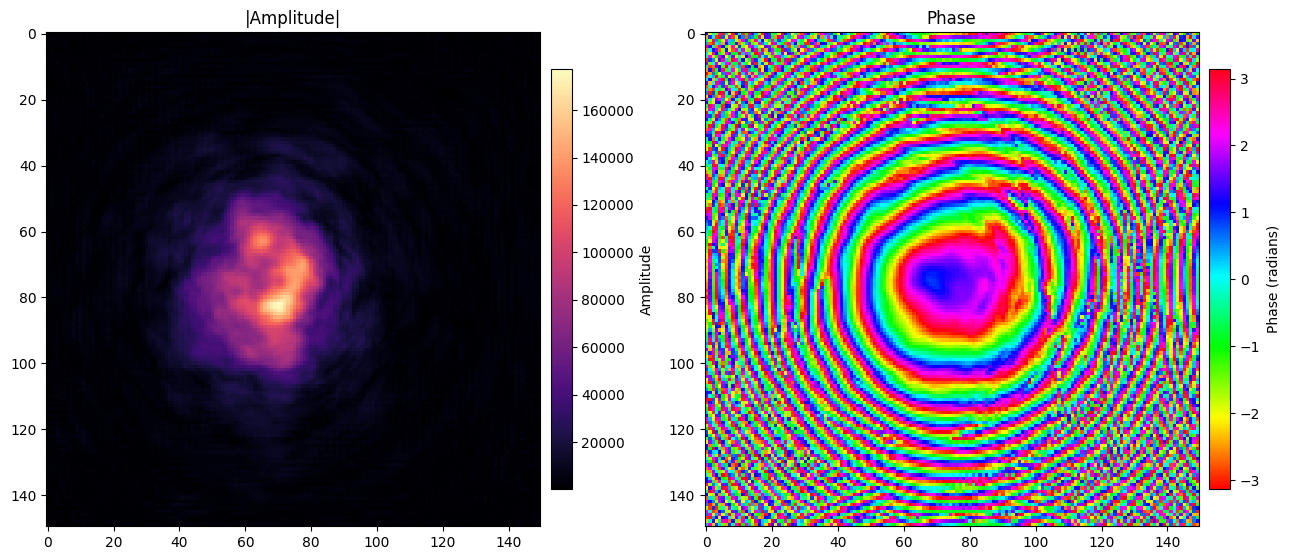

SR=0.704473054642525


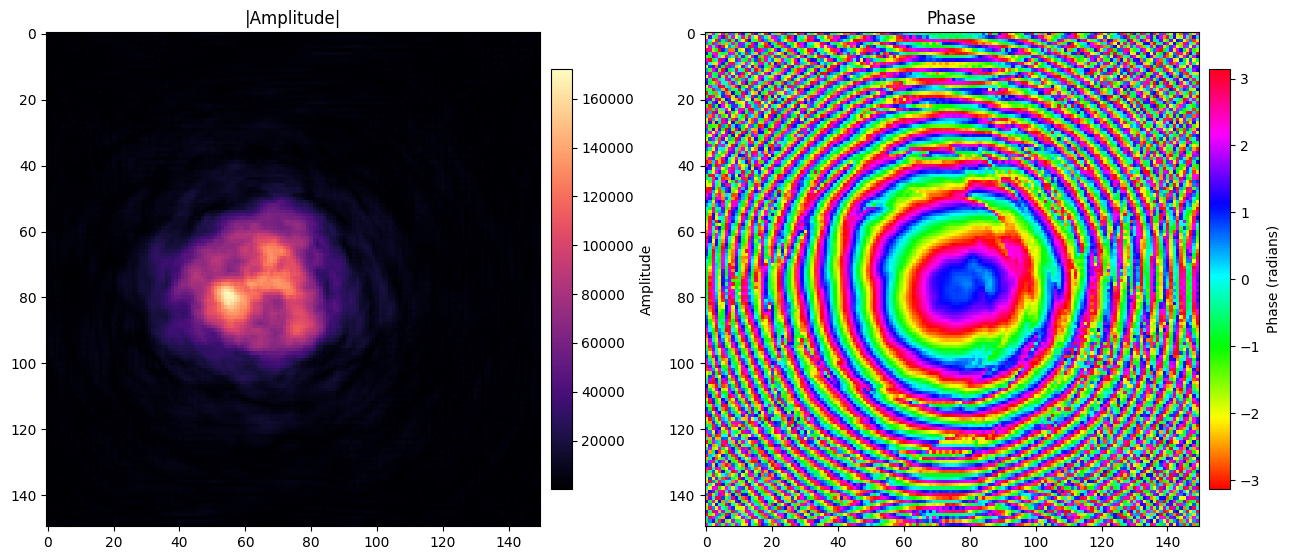

SR=0.7355758384058432


In [4]:
Cn2 = 10e-1
Cn2 = 5e-1
r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=L_prop)
L0 = 5
l0 = 1e-7  # !!!!!!
psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)
SR_nps_5e1 = []
for screens_num in [1, 5, 10]:
      SR = SR_gauss(mesh_2D, L_prop, beam_par, psh_par, epochs=500, screens_num=screens_num)
      SR_nps_1e1.append(SR)

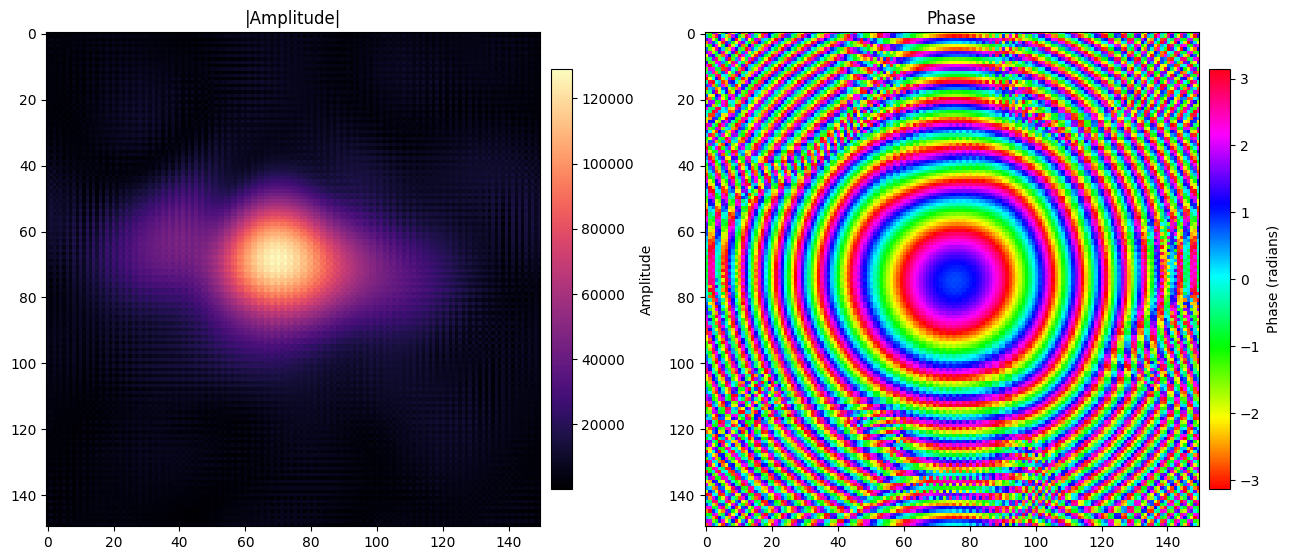

SR=0.33591137363358575


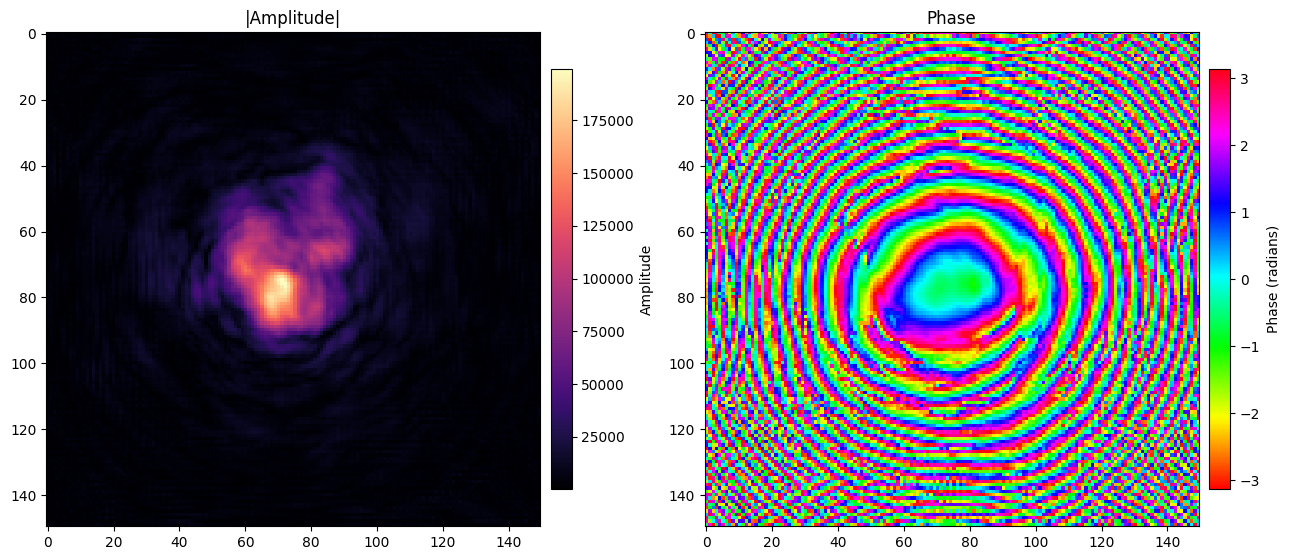

SR=0.5157931940881909


SR=0.5260903687580246


In [5]:
Cn2 = 10e-1
r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=L_prop)
L0 = 5
l0 = 1e-7  # !!!!!!
psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)
SR_nps_10e1 = []
for screens_num in [1, 5, 10]:
      SR = SR_gauss(mesh_2D, L_prop, beam_par, psh_par, epochs=500, screens_num=screens_num)
      SR_nps_1e1.append(SR)

dx= 0.08um, perfect= 0.28um, resolution required=45
Number of screen required: 0.2931488993161201


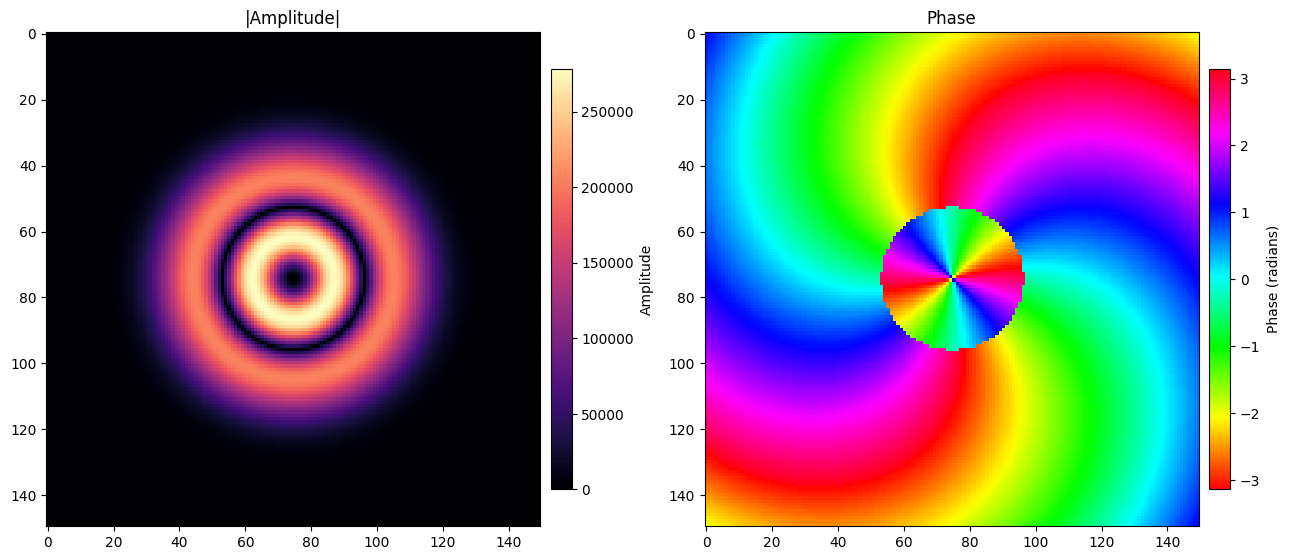

Number of screen required: 12.185178678370525


In [13]:
lmbda = 550e-9
L_prop = 1e-6
width0 = 1e-6
l, p = 0, 0
# xy_lim_2D = (-8.0e-6, 8.0e-6)
xy_lim_2D = (-6.0e-6, 6.0e-6)
res_xy_2D = 150

beam_par = (l, p, width0, lmbda)
k0 = 2 * np.pi / lmbda
xy_2D = np.linspace(*xy_lim_2D, res_xy_2D)
mesh_2D = np.meshgrid(xy_2D, xy_2D, indexing='ij')
pxl_scale = (xy_lim_2D[1] - xy_lim_2D[0]) / (res_xy_2D - 1)
D_window = (xy_lim_2D[1] - xy_lim_2D[0])
perfect_scale = lmbda * np.sqrt(L_prop ** 2 + (D_window / 2) ** 2) / D_window
print(f'dx={pxl_scale * 1e6: .2f}um, perfect={perfect_scale * 1e6: .2f}um,'
      f' resolution required={math.ceil(D_window / perfect_scale + 1)}')
assert res_xy_2D > D_window / perfect_scale + 1, 'Resolution is too low'
# %% turbulence parameters
# Cn2_real_array = [1e-17, 1e-16, 1e-15, 1e-14, 1e-13]  # strong -> weak
Cn2 = 10e-1
Cn2 = 5e-1
Cn2 = 50e-1
r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=L_prop)
L0 = 5
l0 = 1e-7  # !!!!!!
psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)

# %%

screens_num = screens_number(Cn2, k0, dz=L_prop)
print(f'Number of screen required: {screens_num}')
# exit()
LG_21_2D = LG_simple(*mesh_2D, z=0, l=2, p=1, width=width0, k0=k0, x0=0, y0=0, z0=0)
LG_21_2D_z01 = LG_simple(*mesh_2D, z=L_prop, l=2, p=1, width=width0, k0=k0, x0=0, y0=0, z0=0)
#

# plot_field_both(LG_21_2D, extend=None)
plot_field_both(LG_21_2D_z01, extend=None)


# psh_test = psh_wrap(psh_par)




field = propagation_ps(LG_21_2D, beam_par, psh_par, L_prop, screens_num=4)
# plot_field_both(field, extend=None)






Number of screen required: 1.0293019921730244


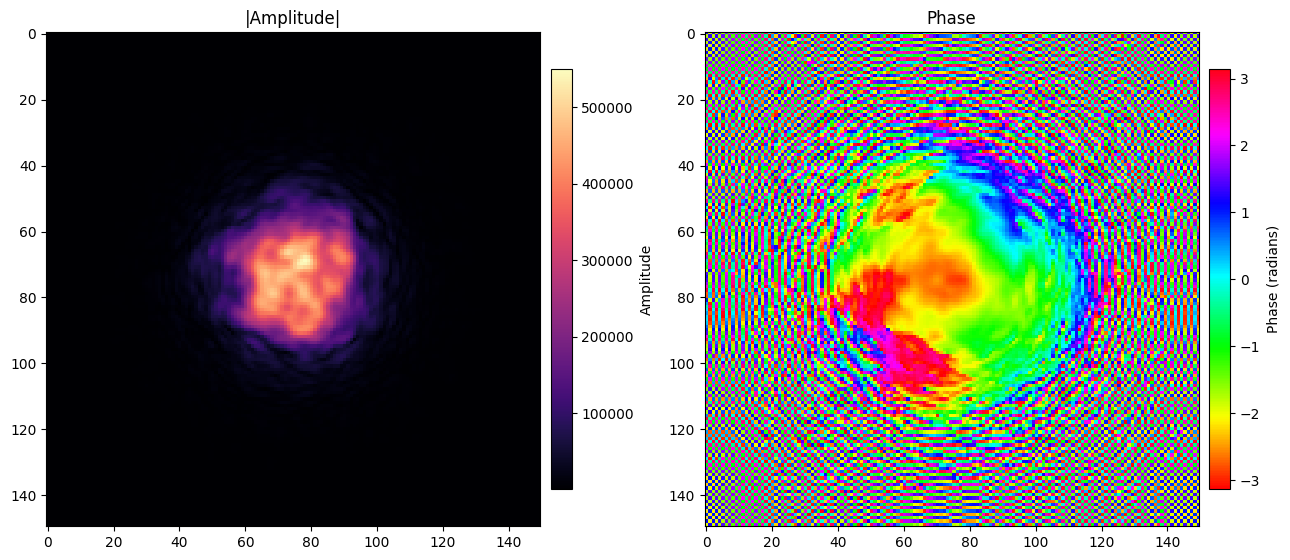

SR=0.9429900713730609


SR=0.9808290807539475


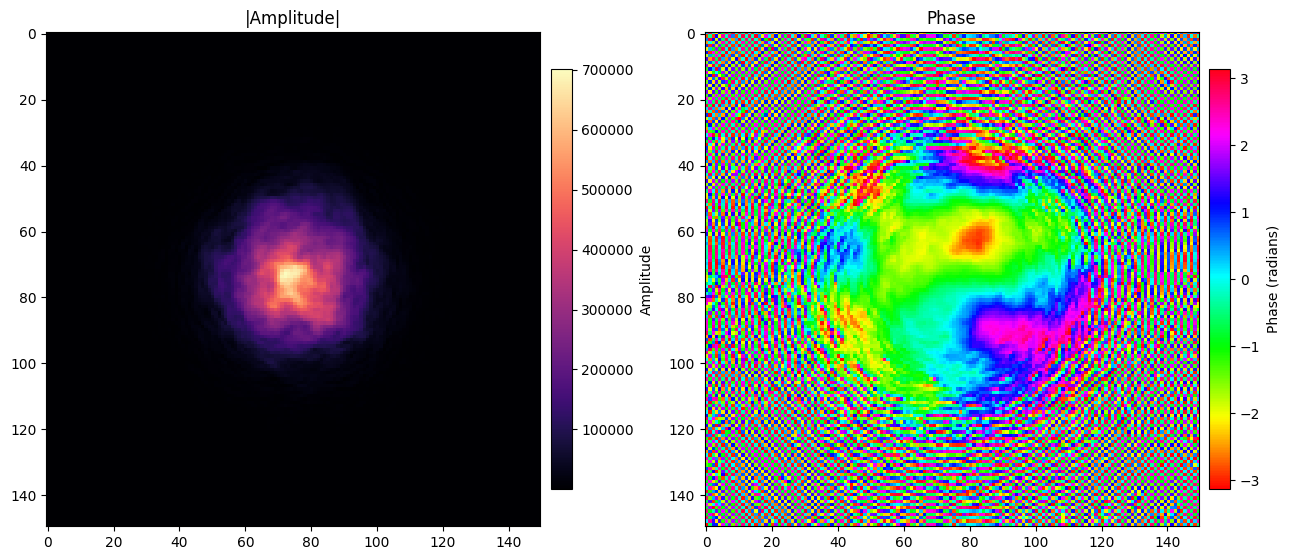

SR=0.9672437467890463


In [17]:
L_prop = 1e-6
Cn2 = 500e-1
r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=L_prop)
L0 = 5
l0 = 1e-7  # !!!!!!
psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)
screens_num = screens_number(Cn2, k0, dz=L_prop)
print(f'Number of screen required: {screens_num}')

SR_nps_50e1_16 = []
for screens_num in [1, 5, 10]:
      SR = SR_gauss(mesh_2D, L_prop, beam_par, psh_par, epochs=500, screens_num=screens_num)
      SR_nps_1e1.append(SR)

In [25]:
L_prop = 1e-6
Cn2 = 1000e-1
r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=L_prop)
L0 = 5
l0 = 1e-7  # !!!!!!
psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)
screens_num = screens_number(Cn2, k0, dz=L_prop)
print(f'Number of screen required: {screens_num}')

SR_nps_1000e1_16 = []
for screens_num in [1, 5, 10]:
      SR = SR_gauss(mesh_2D, L_prop, beam_par, psh_par, epochs=1000, screens_num=screens_num)
      SR_nps_1e1.append(SR)

Number of screen required: 1.5022457803148088


SR=0.9431422599035807


SR=0.9787513440577393


SR=0.9808257950771683


Number of screen required: 2.1924978302133638


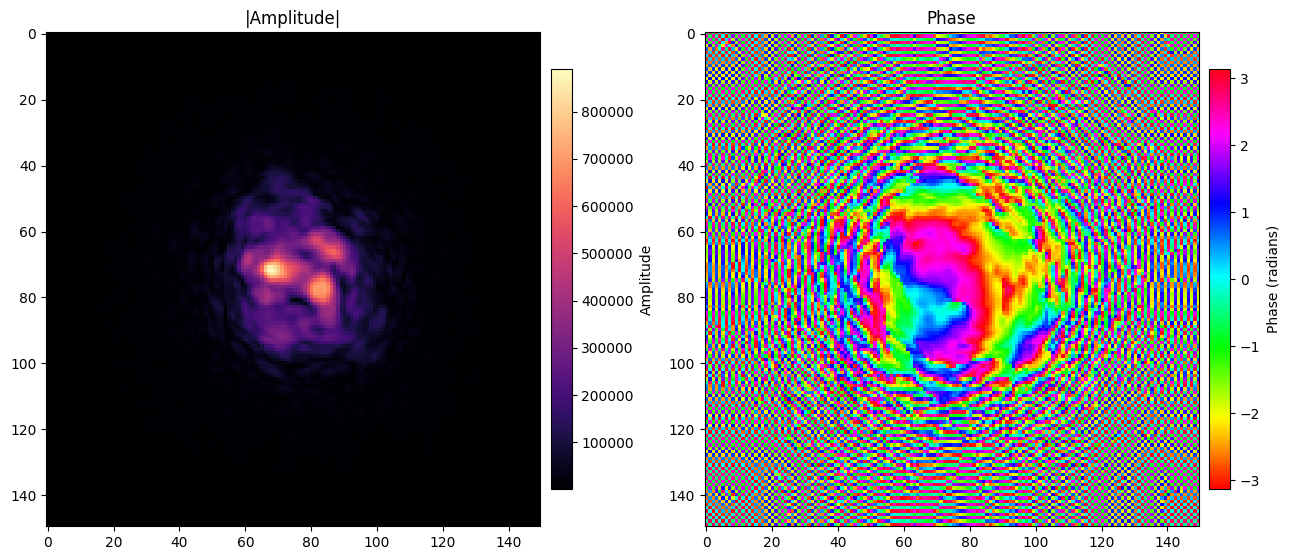

SR=0.8560490162166601


SR=0.9018561318239617


SR=0.9448496646857315


In [21]:
L_prop = 1e-6
Cn2 = 2000e-1
r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=L_prop)
L0 = 5
l0 = 1e-7  # !!!!!!
psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)
screens_num = screens_number(Cn2, k0, dz=L_prop)
print(f'Number of screen required: {screens_num}')

SR_nps_2000e1_16 = []
for screens_num in [1, 5, 10]:
      SR = SR_gauss(mesh_2D, L_prop, beam_par, psh_par, epochs=500, screens_num=screens_num)
      SR_nps_1e1.append(SR)

Number of screen required: 3.199906964946141


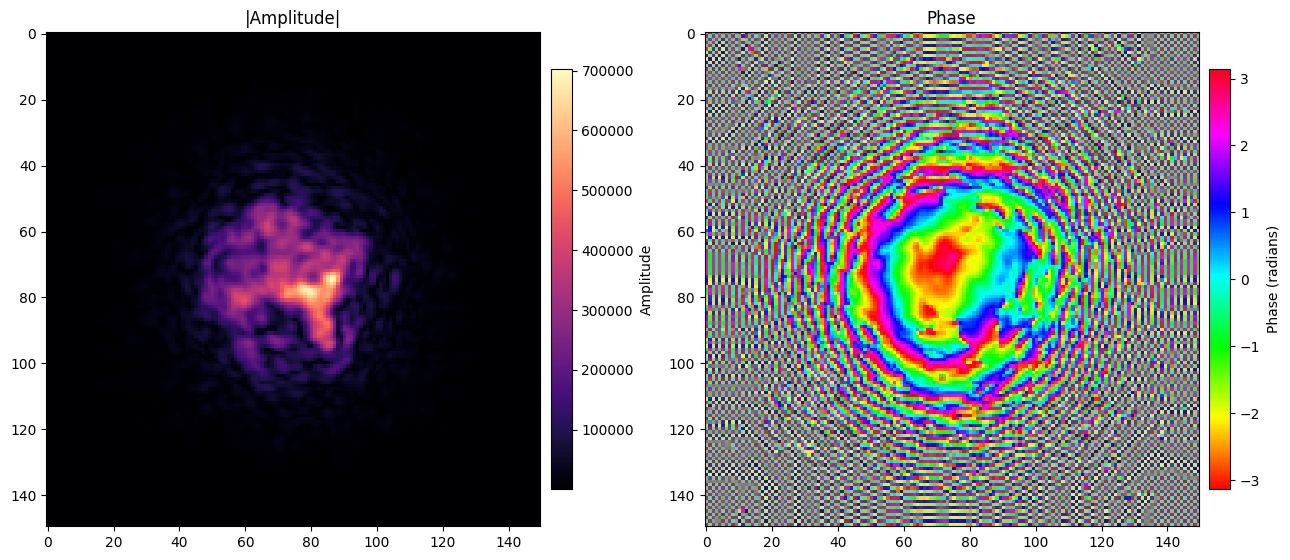

SR=0.7345248521037826


SR=0.8553826196475256


SR=0.9058434742995293


In [22]:
L_prop = 1e-6
Cn2 = 4000e-1
r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=L_prop)
L0 = 5
l0 = 1e-7  # !!!!!!
psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)
screens_num = screens_number(Cn2, k0, dz=L_prop)
print(f'Number of screen required: {screens_num}')

SR_nps_4000e1_16 = []
for screens_num in [1, 5, 10]:
      SR = SR_gauss(mesh_2D, L_prop, beam_par, psh_par, epochs=500, screens_num=screens_num)
      SR_nps_1e1.append(SR)

Number of screen required: 3.199906964946141


SR=0.780002980889207


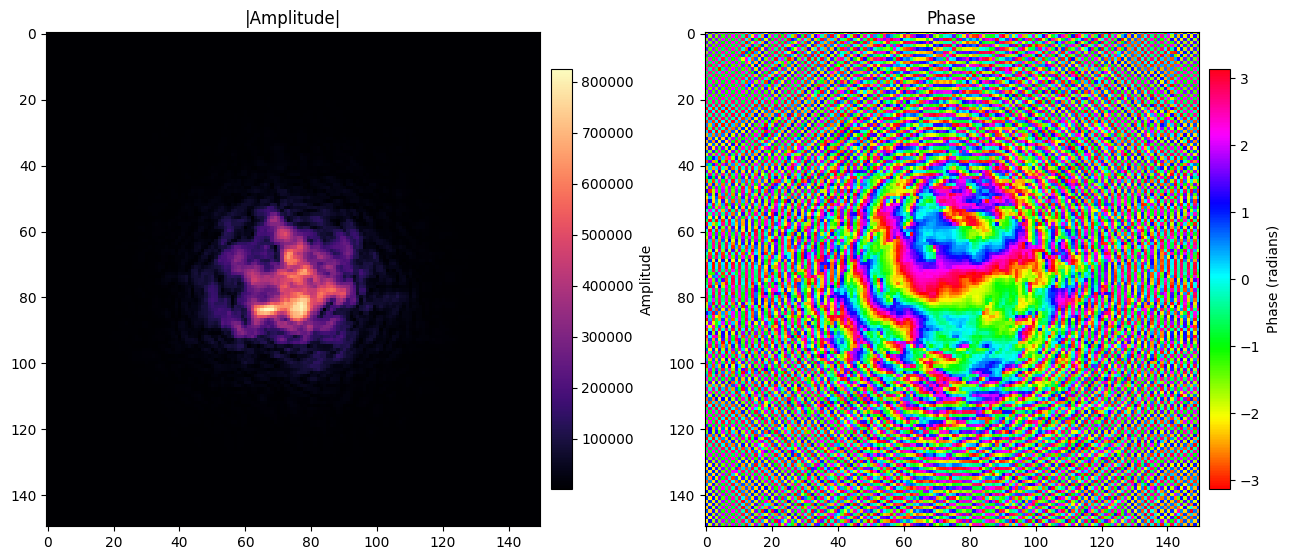

SR=0.904618976661609


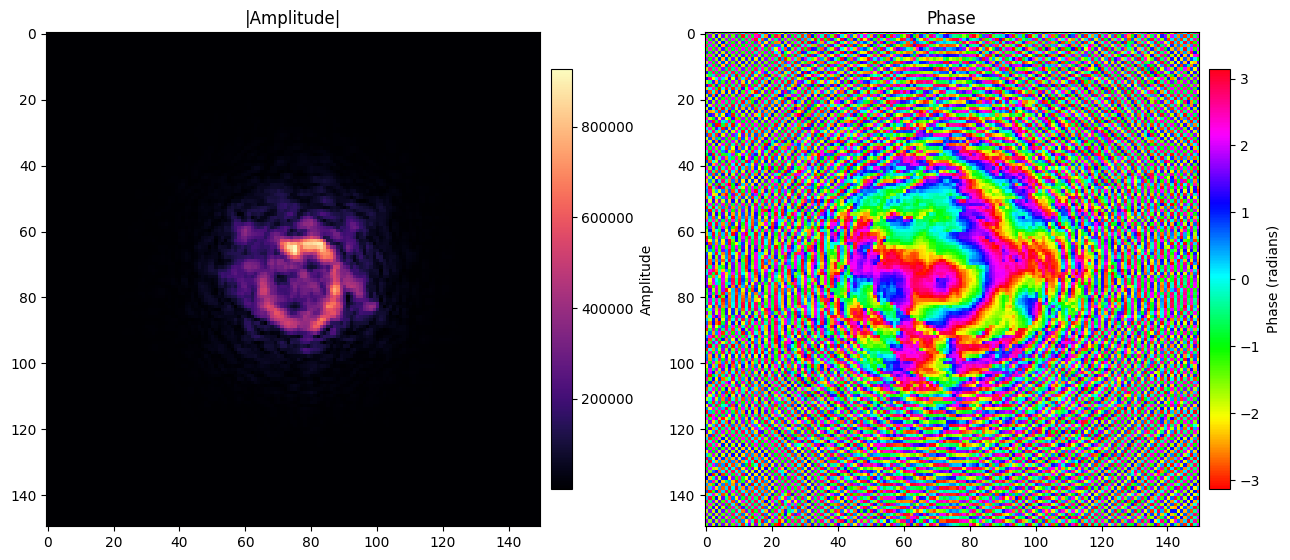

SR=0.8334784918765806


In [23]:
L_prop = 1e-6
Cn2 = 4000e-1
r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=L_prop)
L0 = 5
l0 = 1e-7  # !!!!!!
psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)
screens_num = screens_number(Cn2, k0, dz=L_prop)
print(f'Number of screen required: {screens_num}')

SR_nps_4000e1_16 = []
for screens_num in [1, 5, 10]:
      SR = SR_gauss(mesh_2D, L_prop, beam_par, psh_par, epochs=1000, screens_num=screens_num)
      SR_nps_1e1.append(SR)


Number of screen required: 3.199906964946141


SR=0.7097821030224513


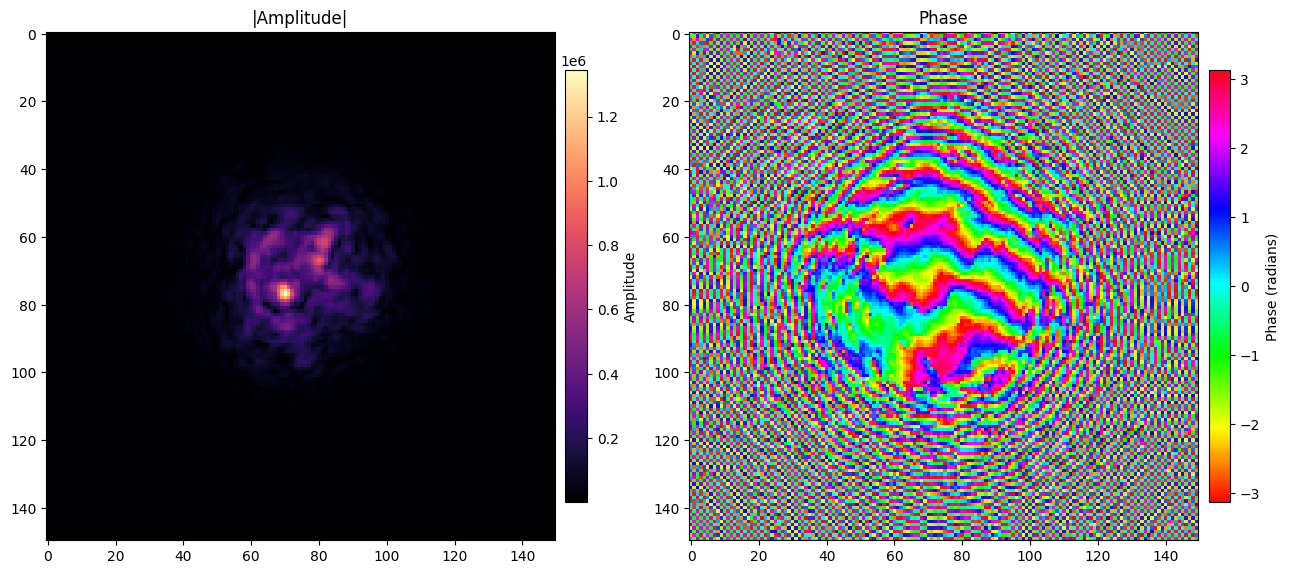

SR=0.8699102924970913


SR=0.8840349953747644


In [24]:
L_prop = 1e-6
Cn2 = 4000e-1
r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=L_prop)
L0 = 5
l0 = 1e-7  # !!!!!!
psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)
screens_num = screens_number(Cn2, k0, dz=L_prop)
print(f'Number of screen required: {screens_num}')

SR_nps_4000e1_16 = []
for screens_num in [1, 5, 10]:
      SR = SR_gauss(mesh_2D, L_prop, beam_par, psh_par, epochs=1000, screens_num=screens_num)
      SR_nps_1e1.append(SR)


In [40]:
# long distance
# 1
SR_1_l = [0.8528, 0.475, .336]
# 5
SR_5_l = [0.915, 0.705, .516]
# 10
SR_10_l = [0.934, 0.736, .526]


In [45]:

# short distance  1000 2000 4000
# 1
SR_1_s = [0.96, 0.88, 0.77]
# 5
SR_5_s = [0.98, 0.935, 0.86]
# 10
SR_10_s = [0.98, 0.93, 0.865]

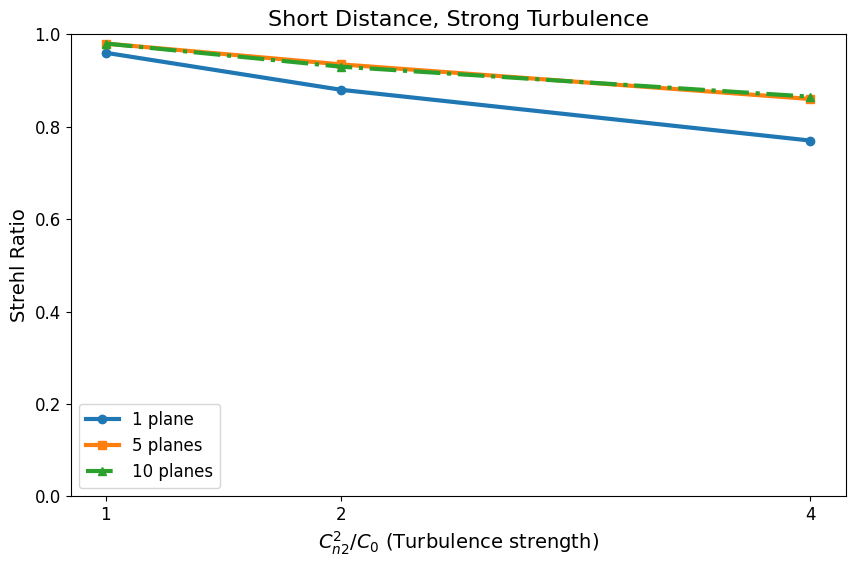

In [46]:
# import matplotlib.pyplot as plt

# Sample data


# Assuming these correspond to some variable (e.g., time or another parameter)
# Since the specific x-values are not provided, I will use a simple range for demonstration
x_values = [1, 2, 4]

# Create a plot
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(x_values, SR_1_s, label='1 plane', marker='o', ls='-', lw=3)
plt.plot(x_values, SR_5_s, label='5 planes', marker='s', ls='-', lw=3)
plt.plot(x_values, SR_10_s, label='10 planes', marker='^', ls='-.', lw=3)

# Adding labels and title
plt.xlabel(r'$C_{n2}^2/C_0$ (Turbulence strength)', fontsize=14)
plt.ylabel('Strehl Ratio', fontsize=14)
plt.title('Short Distance, Strong Turbulence', fontsize=16)

# Adding ticks
plt.xticks(x_values, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
# Adding a legend
plt.legend(fontsize=12)

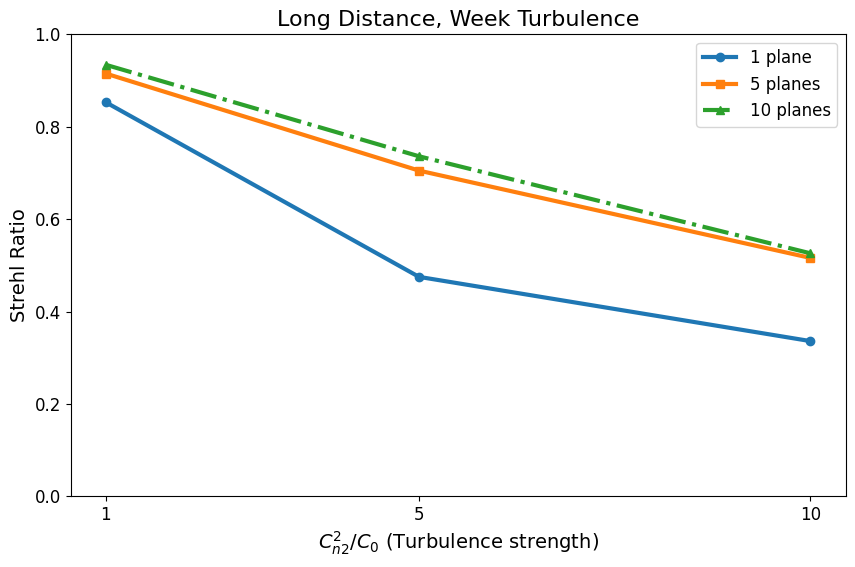

In [44]:
# Since the specific x-values are not provided, I will use a simple range for demonstration
x_values = [1, 5, 10]

# Create a plot
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(x_values, SR_1_l, label='1 plane', marker='o', ls='-', lw=3)
plt.plot(x_values, SR_5_l, label='5 planes', marker='s', ls='-', lw=3)
plt.plot(x_values, SR_10_l, label='10 planes', marker='^', ls='-.', lw=3)

# Adding labels and title
plt.xlabel(r'$C_{n2}^2/C_0$ (Turbulence strength)', fontsize=14)
plt.ylabel('Strehl Ratio', fontsize=14)
plt.title('Long Distance, Week Turbulence', fontsize=16)

# Adding ticks
plt.xticks(x_values, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
# Adding a legend
plt.legend(fontsize=12)